In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from collections import Counter

# DATA FITTING


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
Football_Data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/la-liga-prediciton/resampled_team_Match_dataB.csv")
Football_Data['date']=pd.to_datetime(Football_Data['date'])
Football_Data.info()
print(Football_Data.columns)
Data=Football_Data
schedule = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/la-liga-prediciton/schedule_25-26.csv")
print(Football_Data.columns)

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045 entries, 0 to 3044
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   3045 non-null   datetime64[ns]
 1   home_team_id           3045 non-null   int64         
 2   away_team_id           3045 non-null   int64         
 3   away_expected_points   3045 non-null   float64       
 4   away_xg                3045 non-null   float64       
 5   away_np_xg             3045 non-null   float64       
 6   away_ppda              3045 non-null   float64       
 7   away_deep_completions  3045 non-null   int64         
 8   home_points            3045 non-null   int64         
 9   home_expected_points   3045 non-null   float64       
 10  home_xg                3045 non-null   float64       
 11  home_np_xg             3045 non-null   float64       
 12  home_ppda              3045 non-null

In [ ]:
Football_Test_Data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/la-liga-prediciton/team_Match_dataB.csv")
Football_Test_Data['date']=pd.to_datetime(Football_Data['date'])
Football_Test_Data.info()
print(Football_Test_Data.columns)
Data2=Football_Test_Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   2280 non-null   datetime64[ns]
 1   home_team_id           2280 non-null   int64         
 2   away_team_id           2280 non-null   int64         
 3   away_expected_points   2280 non-null   float64       
 4   away_xg                2280 non-null   float64       
 5   away_np_xg             2280 non-null   float64       
 6   away_ppda              2280 non-null   float64       
 7   away_deep_completions  2280 non-null   int64         
 8   home_points            2280 non-null   int64         
 9   home_expected_points   2280 non-null   float64       
 10  home_xg                2280 non-null   float64       
 11  home_np_xg             2280 non-null   float64       
 12  home_ppda              2280 non-null   float64       
 13  hom

In [ ]:
# Calculate correlation matrix
correlation_matrix = Football_Data.corr()

# Get correlations with the 'result' column
if 'result' in correlation_matrix.columns:
    result_correlation = correlation_matrix['result'].sort_values(ascending=False)

    # Drop the correlation of 'result' with itself
    result_correlation = result_correlation.drop('result')

    print("\nCorrelation with 'result' column (ranked):")
    print(result_correlation)
else:
    print("\n'result' column not found in the DataFrame.")



Correlation with 'result' column (ranked):
home_points              0.327327
Xpoint_diff              0.283989
home_expected_points     0.267131
Xg_diff                  0.259655
elo_diff                 0.175616
home_xg                  0.083576
away_team_id             0.071453
home_np_xg               0.063209
home_team_elo            0.062667
home_xg_avg_last3        0.055831
home_xg_trend            0.047184
deep_comp_ratio          0.039394
home_deep_completions    0.018767
ppda_ratio              -0.009362
home_team_id            -0.022323
away_ppda               -0.037333
date                    -0.043606
home_ppda               -0.070799
away_deep_completions   -0.178490
away_team_elo           -0.185134
away_xg_avg_last3       -0.268056
away_expected_points    -0.299896
away_np_xg              -0.316992
away_xg                 -0.320586
Name: result, dtype: float64


In [ ]:
Football_Data =  Data
Football_Test_Data.drop(['home_points'], axis=1,inplace=True)
Football_Data  = Football_Data.drop(['home_points'], axis=1)

In [ ]:
Football_Data.head()

,date,home_team_id,away_team_id,away_expected_points,away_xg,away_np_xg,away_ppda,away_deep_completions,home_expected_points,home_xg,...,away_team_elo,result,Xg_diff,elo_diff,Xpoint_diff,ppda_ratio,deep_comp_ratio,home_xg_avg_last3,away_xg_avg_last3,home_xg_trend
0,2019-08-16 20:00:00,147,148,1.8714,1.03621,1.03621,7.062500,5,0.7887,0.457129,...,2001.228638,1,-0.579081,-279.209229,-1.0827,2.123894,0.600000,0.457129,1.03621,0.002049
1,2019-08-17 16:00:00,152,150,1.7477,1.99723,1.99723,14.086957,8,0.9905,1.511660,...,1841.848999,0,-0.485570,-160.685547,-0.7572,0.807017,0.625000,1.511660,1.99723,0.002049
2,2019-08-17 18:00:00,146,140,0.9553,1.79528,1.05213,7.269231,6,1.7860,2.313960,...,1719.431152,2,0.518680,94.223877,0.8307,2.517460,1.166666,2.313960,1.79528,0.002049
3,2019-08-17 18:00:00,146,140,0.9553,1.79528,1.05213,7.269231,6,1.7860,2.313960,...,1719.431152,2,0.518680,94.223877,0.8307,2.517460,1.166666,2.313960,1.79528,0.000000
4,2019-08-17 18:00:00,146,140,0.9553,1.79528,1.05213,7.269231,6,1.7860,2.313960,...,1719.431152,2,0.518680,94.223877,0.8307,2.517460,1.166666,2.313960,1.79528,0.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Drop the target variable and keep features in X
X = Football_Data.drop('result', axis=1)
# Select the target variable y and ensure it's an integer type
y = Football_Data['result'].astype(int)

# Drop the 'date' column as RandomForestClassifier cannot handle datetime objects
if 'date' in X.columns:
    X = X.drop('date', axis=1)

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in X.columns:
    X = X.drop('Unnamed: 0', axis=1)


# Split data into training and testing sets (correcting the order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(class_weight='balanced', max_depth=35, n_estimators=100,random_state=42)
# model = RandomForestClassifier(n_estimators=50)
# model = RandomForestClassifier
model.fit(X_train, y_train)

# Make predictions on the test set
preds = model.predict(X_test)
combined = pd.DataFrame(dict(actual=y_test, predicted=preds), index=y_test.index)
# Calculate and print accuracy
acc  = accuracy_score(y_test, preds)
print('ACCURACYYY:',acc)
#0.75394

ACCURACYYY: 0.7586206896551724


In [ ]:
T_X = Football_Test_Data.drop('result', axis=1)
# Select the target variable y and ensure it's an integer type
T_y = Football_Test_Data['result'].astype(int)

# Drop the 'date' column from the test data as well
if 'date' in T_X.columns:
    T_X = T_X.drop('date', axis=1)


preds = model.predict(T_X)
combined = pd.DataFrame(dict(actual=T_y, predicted=preds), index=T_y.index)
# Calculate and print accuracy
acc  = accuracy_score(T_y, preds)
print('ACCURACYYY:',acc) # this will result in high accuracy reason, test data and the training that you same

ACCURACYYY: 0.9381578947368421


# Predictions

## schedule matches feature engeering

In [ ]:
schedule.date = pd.to_datetime(schedule.date)

In [ ]:
# Filter the schedule based on the 'date' column
FirstRound_schedule = schedule.loc[schedule['date'] < '2025-08-19 20:30:00', ['home_team', 'away_team', 'date']]
display(FirstRound_schedule.tail())

,home_team,away_team,date
4,Celta Vigo,Getafe,2025-08-17 15:00:00+00:00
5,Athletic Club,Sevilla,2025-08-17 17:30:00+00:00
6,Espanyol,Atletico Madrid,2025-08-17 19:30:00+00:00
7,Elche,Real Betis,2025-08-18 19:00:00+00:00
8,Real Madrid,Osasuna,2025-08-19 19:00:00+00:00


In [ ]:
def prepare_match_data(home_team, away_team, num_matches=5, data=Football_Data):
    """Prepare match data for prediction - aligned with training features"""
    team_encoding = {'Almeria': np.int64(208), 'Granada': np.int64(155), 'Malaga': np.int64(137), 'Sevilla': np.int64(138), 'Barcelona': np.int64(148), 'Celta Vigo': np.int64(152), 'Eibar': np.int64(156), 'Levante': np.int64(151), 'Rayo Vallecano': np.int64(145), 'Real Madrid': np.int64(150), 'Getafe': np.int64(142), 'Valencia': np.int64(146), 'Athletic Club': np.int64(147), 'Atletico Madrid': np.int64(143), 'Cordoba': np.int64(206), 'Espanyol': np.int64(141), 'Deportivo La Coruna': np.int64(139), 'Elche': np.int64(207), 'Real Sociedad': np.int64(140), 'Villarreal': np.int64(154), 'Sporting Gijon': np.int64(149), 'Real Betis': np.int64(153), 'Las Palmas': np.int64(144), 'Osasuna': np.int64(157), 'Alaves': np.int64(158), 'Leganes': np.int64(159), 'Girona': np.int64(223), 'Real Valladolid': np.int64(231), 'SD Huesca': np.int64(232), 'Mallorca': np.int64(239), 'Cadiz': np.int64(261)}


    def get_team_recent_stats(team_id, num_matches=5, as_home=True, data=data):
        """Get recent statistics for a team"""
        if as_home:
            team_matches = data[data['home_team_id'] == team_id].tail(num_matches)
            stats = {
                'expected_points': team_matches['home_expected_points'].mean(),
                'xg': team_matches['home_xg'].mean(),
                'np_xg': team_matches['home_np_xg'].mean(),
                'ppda': team_matches['home_ppda'].mean(),
                'deep_completions': team_matches['home_deep_completions'].mean(),
                'elo': team_matches['home_team_elo'].mean(),
                'xg_avg_last3': team_matches['home_xg'].tail(3).mean() if len(team_matches) >= 3 else team_matches['home_xg'].mean(),
                'xg_trend': 0.0  # Will calculate separately
            }

            # Calculate xG trend (last 3 vs previous 3)
            if len(team_matches) >= 6:
                last3 = team_matches['home_xg'].tail(3).mean()
                prev3 = team_matches['home_xg'].iloc[-6:-3].mean()
                stats['xg_trend'] = last3 - prev3
            elif len(team_matches) >= 3:
                stats['xg_trend'] = 0.0  # Not enough data for trend

        else:
            team_matches = data[data['away_team_id'] == team_id].tail(num_matches)
            stats = {
                'expected_points': team_matches['away_expected_points'].mean(),
                'xg': team_matches['away_xg'].mean(),
                'np_xg': team_matches['away_np_xg'].mean(),
                'ppda': team_matches['away_ppda'].mean(),
                'deep_completions': team_matches['away_deep_completions'].mean(),
                'elo': team_matches['away_team_elo'].mean(),
                'xg_avg_last3': team_matches['away_xg'].tail(3).mean() if len(team_matches) >= 3 else team_matches['away_xg'].mean(),
                'xg_trend': 0.0  # Away team trend not used in model
            }

        # Fill NaN values with 0
        for key in stats:
            if np.isnan(stats[key]):
                stats[key] = 0.0

        return stats

    try:
        # Get team IDs
        home_team_id = team_encoding.get(home_team, -1)
        away_team_id = team_encoding.get(away_team, -1)

        if home_team_id == -1:
            raise ValueError(f"Unknown team: {home_team}")
        if away_team_id == -1:
            raise ValueError(f"Unknown team: {away_team}")

        # Get recent stats for both teams from the full dataset
        home_stats = get_team_recent_stats(home_team_id, num_matches, as_home=True, data=data)
        away_stats = get_team_recent_stats(away_team_id, num_matches, as_home=False, data=data)

        # Create match data with exact features from your training data
        match_data = {
            # Basic team info
            'home_team_id': home_team_id,
            'away_team_id': away_team_id,

            # Away team stats (averages from last num_matches)
            'away_expected_points': away_stats['expected_points'],
            'away_xg': away_stats['xg'],
            'away_np_xg': away_stats['np_xg'],
            'away_ppda': away_stats['ppda'],
            'away_deep_completions': away_stats['deep_completions'],

            # Home team stats (averages from last num_matches)
            'home_expected_points': home_stats['expected_points'],
            'home_xg': home_stats['xg'],
            'home_np_xg': home_stats['np_xg'],
            'home_ppda': home_stats['ppda'],
            'home_deep_completions': home_stats['deep_completions'],
            'home_team_elo': home_stats['elo'],
            'away_team_elo': away_stats['elo'],

            # Calculated difference features (matching your training data exactly)
            'Xg_diff': home_stats['xg'] - away_stats['xg'],  # Note: 'Xg_diff' not 'xg_diff'
            'elo_diff': home_stats['elo'] - away_stats['elo'],
            'Xpoint_diff': home_stats['expected_points'] - away_stats['expected_points'],  # Note: 'Xpoint_diff' not 'expected_points_diff'

            # Ratio features
            'ppda_ratio': home_stats['ppda'] / (away_stats['ppda'] + 0.0001),  # Avoid division by zero
            'deep_comp_ratio': home_stats['deep_completions'] / (away_stats['deep_completions'] + 0.0001),

            # xG averages and trend (matching your training features)
            'home_xg_avg_last3': home_stats['xg_avg_last3'],
            'away_xg_avg_last3': away_stats['xg_avg_last3'],
            'home_xg_trend': home_stats['xg_trend']
        }

        # Convert to DataFrame
        match_df = pd.DataFrame([match_data])

        # Define features that exactly match your training data (excluding non-feature columns)
        training_features = ['home_team_id', 'away_team_id', 'home_expected_points', 'home_xg', 'home_np_xg', 'home_ppda', 'home_deep_completions', 'away_expected_points', 'away_xg', 'away_np_xg', 'away_ppda', 'away_deep_completions', 'home_team_elo', 'away_team_elo', 'Xg_diff', 'elo_diff', 'Xpoint_diff', 'ppda_ratio', 'deep_comp_ratio', 'home_xg_avg_last3', 'away_xg_avg_last3', 'home_xg_trend']

        # Select only the features that match your training data
        prediction_df = match_df[training_features]

        # Ensure all values are numeric and handle any remaining NaN values
        prediction_df = prediction_df.fillna(0.0)

        return prediction_df

    except Exception as e:
        print(f"Error preparing match data for {home_team} vs {away_team}: {str(e)}")
        return None

# Fixed loop for processing schedule
match_data = pd.DataFrame()
for x in FirstRound_schedule.iterrows():
    data = prepare_match_data(x[1][0], x[1][1], num_matches=5, data=Football_Data)
    if data is not None:  # Fixed: 'data' not 'Data'
        match_data = pd.concat([match_data, data], ignore_index=True)



print(f"Prepared {len(match_data)} matches for prediction")
print("Features in prepared data:", list(match_data.columns))

Prepared 9 matches for prediction
Features in prepared data: ['home_team_id', 'away_team_id', 'home_expected_points', 'home_xg', 'home_np_xg', 'home_ppda', 'home_deep_completions', 'away_expected_points', 'away_xg', 'away_np_xg', 'away_ppda', 'away_deep_completions', 'home_team_elo', 'away_team_elo', 'Xg_diff', 'elo_diff', 'Xpoint_diff', 'ppda_ratio', 'deep_comp_ratio', 'home_xg_avg_last3', 'away_xg_avg_last3', 'home_xg_trend']


/tmp/ipython-input-1616435872.py:121: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = prepare_match_data(x[1][0], x[1][1], num_matches=5, data=Football_Data)
/tmp/ipython-input-1616435872.py:121: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = prepare_match_data(x[1][0], x[1][1], num_matches=5, data=Football_Data)
/tmp/ipython-input-1616435872.py:121: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = prepare_match_data(

In [ ]:
print(match_data.columns)
Football_Data.columns

Index(['home_team_id', 'away_team_id', 'home_expected_points', 'home_xg',
       'home_np_xg', 'home_ppda', 'home_deep_completions',
       'away_expected_points', 'away_xg', 'away_np_xg', 'away_ppda',
       'away_deep_completions', 'home_team_elo', 'away_team_elo', 'Xg_diff',
       'elo_diff', 'Xpoint_diff', 'ppda_ratio', 'deep_comp_ratio',
       'home_xg_avg_last3', 'away_xg_avg_last3', 'home_xg_trend'],
      dtype='object')


Index(['date', 'home_team_id', 'away_team_id', 'away_expected_points',
       'away_xg', 'away_np_xg', 'away_ppda', 'away_deep_completions',
       'home_expected_points', 'home_xg', 'home_np_xg', 'home_ppda',
       'home_deep_completions', 'home_team_elo', 'away_team_elo', 'result',
       'Xg_diff', 'elo_diff', 'Xpoint_diff', 'ppda_ratio', 'deep_comp_ratio',
       'home_xg_avg_last3', 'away_xg_avg_last3', 'home_xg_trend'],
      dtype='object')

In [ ]:
if match_data is not None:
    # Ensure the columns in match_data are in the same order as the training data (X_train)
    # X_train was created by dropping 'result' and 'date' from Football_Data,
    # so use Football_Data columns (excluding 'result' and 'date') as the reference order.
    training_column_order = [col for col in Football_Data.columns if col not in ['result', 'date']]
    match_data = match_data[training_column_order]

    prediction = model.predict(match_data)
    print(f"Predicted result: {prediction}")

Predicted result: [1 0 2 2 2 2 0 0 1]


## The first Round prediction

In [ ]:
# Make predictions on the prepared match data
predictions = model.predict(match_data)
prediction_probabilities = model.predict_proba(match_data)

# Map predictions to labels
result_labels = {0: 'Away Win', 1: 'Home Win' , 2: 'Draw' }
predicted_labels = [result_labels.get(pred, 'Unknown') for pred in predictions]

# Display the predictions
print("\n--- Upcoming Match Predictions ---")
# Iterate through the match_data DataFrame which has successful predictions
for i, row in match_data.iterrows():
    # Get the corresponding match info from the original schedule using the index
    original_match_info = FirstRound_schedule.loc[i]
    home_team = original_match_info['home_team']
    away_team = original_match_info['away_team']
    prediction = predicted_labels[i]
    probabilities = prediction_probabilities[i]

    print(f"\n{home_team} vs {away_team}:")
    print(f"  Predicted Outcome: {prediction}")
    print(f"  Probabilities:")
    for j, label in result_labels.items():
        print(f"    {label}: {probabilities[j]:.3f}")


--- Upcoming Match Predictions ---

Girona vs Rayo Vallecano:
  Predicted Outcome: Home Win
  Probabilities:
    Away Win: 0.280
    Home Win: 0.360
    Draw: 0.360

Mallorca vs Barcelona:
  Predicted Outcome: Away Win
  Probabilities:
    Away Win: 0.610
    Home Win: 0.130
    Draw: 0.260

Alaves vs Levante:
  Predicted Outcome: Draw
  Probabilities:
    Away Win: 0.360
    Home Win: 0.270
    Draw: 0.370

Valencia vs Real Sociedad:
  Predicted Outcome: Draw
  Probabilities:
    Away Win: 0.230
    Home Win: 0.270
    Draw: 0.500

Celta Vigo vs Getafe:
  Predicted Outcome: Draw
  Probabilities:
    Away Win: 0.200
    Home Win: 0.360
    Draw: 0.440

Athletic Club vs Sevilla:
  Predicted Outcome: Draw
  Probabilities:
    Away Win: 0.190
    Home Win: 0.400
    Draw: 0.410

Espanyol vs Atletico Madrid:
  Predicted Outcome: Away Win
  Probabilities:
    Away Win: 0.430
    Home Win: 0.220
    Draw: 0.350

Elche vs Real Betis:
  Predicted Outcome: Away Win
  Probabilities:
    Away Wi

In [ ]:
FirstRound_schedule.reset_index(drop=True, inplace=True)
prediction_probabilities= prediction_probabilities.max(axis=1)
# Create a DataFrame for prediction probabilities with named columns
probability_df = pd.DataFrame(prediction_probabilities, columns=['prediction_probabilities'])

# Create a DataFrame for predictions
predictions_df = pd.DataFrame(predictions, columns=['predictions'])

# Concatenate predictions, probabilities, and schedule
Result_df = pd.concat([predictions_df, probability_df, FirstRound_schedule], axis=1)
display(Result_df.head())

,predictions,prediction_probabilities,home_team,away_team,date
0,1,0.36,Girona,Rayo Vallecano,2025-08-15 17:00:00+00:00
1,0,0.61,Mallorca,Barcelona,2025-08-16 17:30:00+00:00
2,2,0.37,Alaves,Levante,2025-08-16 19:30:00+00:00
3,2,0.50,Valencia,Real Sociedad,2025-08-16 19:30:00+00:00
4,2,0.44,Celta Vigo,Getafe,2025-08-17 15:00:00+00:00


In [ ]:
# Map predictions to team names or 'Draw'
def map_prediction_to_team(row):
    if row['predictions'] == 1:
        return row['home_team']
    elif row['predictions'] == 0:
        return row['away_team']
    else:
        return 'Draw'

# Apply the mapping to create a new column 'predicted_winner'
Result_df['predicted_winner'] = Result_df.apply(map_prediction_to_team, axis=1)

# Create the final table with match schedule and predicted winner
prediction_table = Result_df[['date', 'home_team', 'away_team', 'predicted_winner']]

# Display the table
print("\n--- First Round Match Predictions ---")
display(prediction_table)


--- First Round Match Predictions ---


,date,home_team,away_team,predicted_winner
0,2025-08-15 17:00:00+00:00,Girona,Rayo Vallecano,Girona
1,2025-08-16 17:30:00+00:00,Mallorca,Barcelona,Barcelona
2,2025-08-16 19:30:00+00:00,Alaves,Levante,Alaves
3,2025-08-16 19:30:00+00:00,Valencia,Real Sociedad,Valencia
4,2025-08-17 15:00:00+00:00,Celta Vigo,Getafe,Celta Vigo
5,2025-08-17 17:30:00+00:00,Athletic Club,Sevilla,Draw
6,2025-08-17 19:30:00+00:00,Espanyol,Atletico Madrid,Espanyol
7,2025-08-18 19:00:00+00:00,Elche,Real Betis,Elche
8,2025-08-19 19:00:00+00:00,Real Madrid,Osasuna,Real Madrid


#Second Leg Wiinner

In [ ]:
# Filter the schedule based on the 'date' column for the specified date range
SecondRound_schedule = schedule.loc[(schedule['date'] >= '2025-08-21 20:30:00') & (schedule['date'] <= '2025-08-26 20:30:00'), ['home_team', 'away_team', 'date']]

print("Schedule between 2025-08-21 and 2025-08-26:")
display(SecondRound_schedule.tail())

Schedule between 2025-08-21 and 2025-08-26:


,home_team,away_team,date
13,Osasuna,Valencia,2025-08-24 15:00:00+00:00
14,Real Sociedad,Espanyol,2025-08-24 17:30:00+00:00
15,Villarreal,Girona,2025-08-24 17:30:00+00:00
16,Athletic Club,Rayo Vallecano,2025-08-25 17:30:00+00:00
17,Sevilla,Getafe,2025-08-25 19:30:00+00:00


In [ ]:
# Fixed loop for processing schedule
match_data = pd.DataFrame()
for x in SecondRound_schedule.iterrows():
    print(x[1][0],x[1][1])
    data = prepare_match_data(x[1][0], x[1][1], num_matches=5, data=Football_Data)
    if data is not None:  # Fixed: 'data' not 'Data'
        print(data)
        match_data = pd.concat([match_data, data], ignore_index=True)

print(f"Prepared {len(match_data)} matches for prediction")
print("Features in prepared data:", list(match_data.columns))

Real Betis Alaves
   home_team_id  away_team_id  home_expected_points  home_xg  home_np_xg  \
0           153           158                 1.626  1.57203     1.57203   

   home_ppda  home_deep_completions  away_expected_points   away_xg  \
0  10.135895                   12.4               1.18954  1.140575   

   away_np_xg  ...  home_team_elo  away_team_elo   Xg_diff    elo_diff  \
0    0.843263  ...    1757.856836     1635.29668  0.431455  122.560156   

   Xpoint_diff  ppda_ratio  deep_comp_ratio  home_xg_avg_last3  \
0      0.43646    1.416934         3.444349           1.259743   

   away_xg_avg_last3  home_xg_trend  
0           1.032211            0.0  

[1 rows x 22 columns]
Mallorca Celta Vigo
   home_team_id  away_team_id  home_expected_points   home_xg  home_np_xg  \
0           239           152               1.00016  1.102596    1.102596   

   home_ppda  home_deep_completions  away_expected_points   away_xg  \
0   6.847619                    3.2               1.28312  

/tmp/ipython-input-2579243412.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(x[1][0],x[1][1])
/tmp/ipython-input-2579243412.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = prepare_match_data(x[1][0], x[1][1], num_matches=5, data=Football_Data)
/tmp/ipython-input-2579243412.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(x[1][0],x[1][1])
/tmp/ipython-input-2579243412.py:5: FutureWarning: Series.__getit

In [ ]:
print(match_data.columns)
Football_Data.columns

Index(['home_team_id', 'away_team_id', 'home_expected_points', 'home_xg',
       'home_np_xg', 'home_ppda', 'home_deep_completions',
       'away_expected_points', 'away_xg', 'away_np_xg', 'away_ppda',
       'away_deep_completions', 'home_team_elo', 'away_team_elo', 'Xg_diff',
       'elo_diff', 'Xpoint_diff', 'ppda_ratio', 'deep_comp_ratio',
       'home_xg_avg_last3', 'away_xg_avg_last3', 'home_xg_trend'],
      dtype='object')


Index(['date', 'home_team_id', 'away_team_id', 'away_expected_points',
       'away_xg', 'away_np_xg', 'away_ppda', 'away_deep_completions',
       'home_expected_points', 'home_xg', 'home_np_xg', 'home_ppda',
       'home_deep_completions', 'home_team_elo', 'away_team_elo', 'result',
       'Xg_diff', 'elo_diff', 'Xpoint_diff', 'ppda_ratio', 'deep_comp_ratio',
       'home_xg_avg_last3', 'away_xg_avg_last3', 'home_xg_trend'],
      dtype='object')

In [ ]:
if match_data is not None:
    # Ensure the columns in match_data are in the same order as the training data (X_train)
    # X_train was created by dropping 'result' and 'date' from Football_Data,
    # so use Football_Data columns (excluding 'result' and 'date') as the reference order.
    training_column_order = [col for col in Football_Data.columns if col not in ['result', 'date']]
    match_data = match_data[training_column_order]

    prediction = model.predict(match_data)
    print(f"Predicted result: {prediction}")

Predicted result: [1 0 1 1 1 2 1 1 1]


In [ ]:
# Make predictions on the prepared match data
predictions = model.predict(match_data)
prediction_probabilities = model.predict_proba(match_data)

# Map predictions to labels
result_labels = {0: 'Away Win', 1: 'Home Win' , 2: 'Draw' }
predicted_labels = [result_labels.get(pred, 'Unknown') for pred in predictions]

# Display the predictions
print("\n--- Upcoming Match Predictions ---")
# Ensure the index of SecondRound_schedule matches match_data
SecondRound_schedule_reset = SecondRound_schedule.reset_index(drop=True)

# Iterate through the match_data DataFrame which has successful predictions
for i, row in match_data.iterrows():
    # Get the corresponding match info from the original schedule using the index
    original_match_info = SecondRound_schedule_reset.loc[i]
    home_team = original_match_info['home_team']
    away_team = original_match_info['away_team']
    prediction = predicted_labels[i]
    probabilities = prediction_probabilities[i]

    print(f"\n{home_team} vs {away_team}:")
    print(f"  Predicted Outcome: {prediction}")
    print(f"  Probabilities:")
    for j, label in result_labels.items():
        print(f"    {label}: {probabilities[j]:.3f}")


--- Upcoming Match Predictions ---

Real Betis vs Alaves:
  Predicted Outcome: Home Win
  Probabilities:
    Away Win: 0.270
    Home Win: 0.380
    Draw: 0.350

Mallorca vs Celta Vigo:
  Predicted Outcome: Away Win
  Probabilities:
    Away Win: 0.560
    Home Win: 0.150
    Draw: 0.290

Atletico Madrid vs Elche:
  Predicted Outcome: Home Win
  Probabilities:
    Away Win: 0.210
    Home Win: 0.630
    Draw: 0.160

Levante vs Barcelona:
  Predicted Outcome: Home Win
  Probabilities:
    Away Win: 0.330
    Home Win: 0.360
    Draw: 0.310

Osasuna vs Valencia:
  Predicted Outcome: Home Win
  Probabilities:
    Away Win: 0.210
    Home Win: 0.480
    Draw: 0.310

Real Sociedad vs Espanyol:
  Predicted Outcome: Draw
  Probabilities:
    Away Win: 0.340
    Home Win: 0.310
    Draw: 0.350

Villarreal vs Girona:
  Predicted Outcome: Home Win
  Probabilities:
    Away Win: 0.130
    Home Win: 0.460
    Draw: 0.410

Athletic Club vs Rayo Vallecano:
  Predicted Outcome: Home Win
  Probabilit

## the league winner

In [ ]:
pred_schedule = schedule.reset_index()
pred_schedule2 = pred_schedule
pred_schedule = pred_schedule.drop('date', axis=1)

In [ ]:
full_match_data = pd.DataFrame()
for index, row in pred_schedule.iterrows():
    data = prepare_match_data(row['home_team'], row['away_team'], num_matches=5, data=Football_Data)

    if data is not None:
        full_match_data = pd.concat([full_match_data, data], ignore_index=True)

# Ensure the columns in full_match_data are in the same order as the training data (X_train)
# Use Football_Data columns (excluding 'result' and 'date') as the reference order.
training_column_order = [col for col in Football_Data.columns if col not in ['result', 'date']]
full_match_data = full_match_data[training_column_order]

# Make predictions on the prepared match data
Full_predictions = model.predict(full_match_data)
Full_prediction_probabilities = model.predict_proba(full_match_data)
print(Full_prediction_probabilities)
Fullprediction_probabilities = pd.DataFrame(Full_prediction_probabilities.max(axis=1),columns=['probabilities'] )

[[0.28 0.36 0.36]
 [0.61 0.13 0.26]
 [0.36 0.27 0.37]
 ...
 [0.37 0.28 0.35]
 [0.18 0.58 0.24]
 [0.32 0.34 0.34]]


In [ ]:
TheFull_predictions = pd.DataFrame(Full_predictions.astype(int),columns=['predictions'])
Full_Result_df = pd.concat([pred_schedule2,TheFull_predictions,Fullprediction_probabilities],axis=1,)
Full_Result_df.tail()

,index,date,home_team,away_team,predictions,probabilities
337,337,2026-05-24 18:00:00+00:00,Getafe,Osasuna,2,0.40
338,338,2026-05-24 18:00:00+00:00,Girona,Elche,2,0.37
339,339,2026-05-24 18:00:00+00:00,Real Betis,Levante,0,0.37
340,340,2026-05-24 18:00:00+00:00,Real Madrid,Athletic Club,1,0.58
341,341,2026-05-24 18:00:00+00:00,Villarreal,Atletico Madrid,1,0.34


In [ ]:
# Function to calculate points for a team in filtered matches
def calculate_team_points(team_name, matches_df):
    team_points = 0
    for index, row in matches_df.iterrows():
        predicted_result = row['predictions']
        if row['home_team'] == team_name:
            if predicted_result == 1: # Home win
                team_points += 3
            elif predicted_result == 2: # Draw
                team_points += 1
        elif row['away_team'] == team_name:
            if predicted_result == 0: # Away win
                team_points += 3
            elif predicted_result == 2: # Draw
                team_points += 1
    return team_points
max = ['None',0]
# Calculate total points for each team
for team in schedule['home_team'].unique():
  total_points = calculate_team_points(team,Full_Result_df)
  if total_points > max[1]:
    max = [team,total_points]
  print(f"Predicted total points for {team}: {total_points}")

print (f'\n\n\nTeam wins The League : {max[0]}: {max[1]}')

Predicted total points for Girona: 26
Predicted total points for Mallorca: 12
Predicted total points for Alaves: 27
Predicted total points for Valencia: 43
Predicted total points for Celta Vigo: 52
Predicted total points for Athletic Club: 51
Predicted total points for Espanyol: 34
Predicted total points for Elche: 17
Predicted total points for Real Madrid: 95
Predicted total points for Real Betis: 46
Predicted total points for Atletico Madrid: 91
Predicted total points for Levante: 51
Predicted total points for Osasuna: 51
Predicted total points for Real Sociedad: 37
Predicted total points for Villarreal: 94
Predicted total points for Sevilla: 42
Predicted total points for Rayo Vallecano: 8
Predicted total points for Barcelona: 91
Predicted total points for Getafe: 43



Team wins The League : Real Madrid: 95


Updated Full_Result_df:


,index,date,home_team,away_team,predictions,probabilities,predicted_winner
0,0,2025-08-15 17:00:00+00:00,Girona,Rayo Vallecano,1,0.36,Girona
1,1,2025-08-16 17:30:00+00:00,Mallorca,Barcelona,0,0.61,Barcelona
2,2,2025-08-16 19:30:00+00:00,Alaves,Levante,2,0.37,Draw
3,3,2025-08-16 19:30:00+00:00,Valencia,Real Sociedad,2,0.50,Draw
4,4,2025-08-17 15:00:00+00:00,Celta Vigo,Getafe,2,0.44,Draw



Updated Result_df:


,predictions,prediction_probabilities,home_team,away_team,date,match,predicted_winner
0,1,0.36,Girona,Rayo Vallecano,2025-08-15 17:00:00+00:00,Girona vs Rayo Vallecano,Girona
1,0,0.61,Mallorca,Barcelona,2025-08-16 17:30:00+00:00,Mallorca vs Barcelona,Barcelona
2,2,0.37,Alaves,Levante,2025-08-16 19:30:00+00:00,Alaves vs Levante,Draw
3,2,0.50,Valencia,Real Sociedad,2025-08-16 19:30:00+00:00,Valencia vs Real Sociedad,Draw
4,2,0.44,Celta Vigo,Getafe,2025-08-17 15:00:00+00:00,Celta Vigo vs Getafe,Draw


In [ ]:
Full_Result_df.to_csv('/content/drive/MyDrive/Colab Notebooks/la-liga-prediciton/results/Full_Result_df.csv')
Result_df.to_csv('/content/drive/MyDrive/Colab Notebooks/la-liga-prediciton/results/Result_df.csv')

In [ ]:
print(Full_Result_df)
print(Result_df)

     index                      date    home_team        away_team  \
0        0 2025-08-15 17:00:00+00:00       Girona   Rayo Vallecano   
1        1 2025-08-16 17:30:00+00:00     Mallorca        Barcelona   
2        2 2025-08-16 19:30:00+00:00       Alaves          Levante   
3        3 2025-08-16 19:30:00+00:00     Valencia    Real Sociedad   
4        4 2025-08-17 15:00:00+00:00   Celta Vigo           Getafe   
..     ...                       ...          ...              ...   
337    337 2026-05-24 18:00:00+00:00       Getafe          Osasuna   
338    338 2026-05-24 18:00:00+00:00       Girona            Elche   
339    339 2026-05-24 18:00:00+00:00   Real Betis          Levante   
340    340 2026-05-24 18:00:00+00:00  Real Madrid    Athletic Club   
341    341 2026-05-24 18:00:00+00:00   Villarreal  Atletico Madrid   

     predictions  probabilities predicted_winner  
0              1           0.36           Girona  
1              0           0.61        Barcelona  
2     

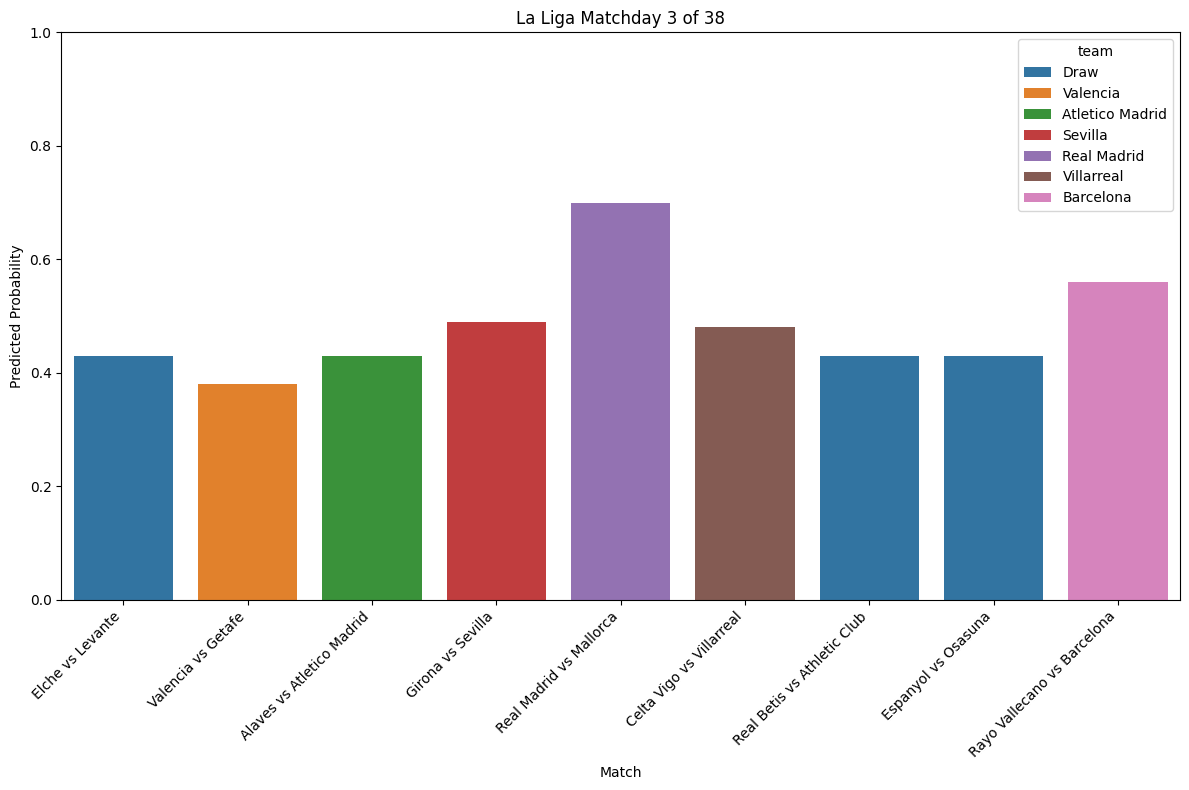

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the full results DataFrame
Full_Result_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/la-liga-prediciton/results/Full_Result_df.csv')

# Filter for matches with index from 9 to 17
filtered_matches = Full_Result_df.loc[19:27].copy()

# Map predictions to team names or 'Draw' for the filtered data
def map_prediction_to_team(row):
    if row['predictions'] == 1:
        return row['home_team']
    elif row['predictions'] == 0:
        return row['away_team']
    else:
        return 'Draw'

filtered_matches['predicted_winner_name'] = filtered_matches.apply(map_prediction_to_team, axis=1)

# Prepare data for visualization
plot_data = []
for index, row in filtered_matches.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    predicted_winner = row['predicted_winner_name']
    probability = row['probabilities']

    # Assign the probability to the predicted winner
    # For 'Draw', we can represent it as a separate category
    if predicted_winner == home_team:
        plot_data.append({'match': f"{home_team} vs {away_team}", 'team': home_team, 'probability': probability, 'outcome': 'Home Win'})

    elif predicted_winner == away_team:
        plot_data.append({'match': f"{home_team} vs {away_team}", 'team': away_team, 'probability': probability, 'outcome': 'Away Win'})

    else: # Draw
        plot_data.append({'match': f"{home_team} vs {away_team}", 'team': 'Draw', 'probability': probability, 'outcome': 'Draw'})



plot_df = pd.DataFrame(plot_data)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='match', y='probability', hue='team', data=plot_df)
plt.title('La Liga Matchday 3 of 38')
plt.ylabel('Predicted Probability')
plt.xlabel('Match')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1) # Probabilities are between 0 and 1
plt.tight_layout()
plt.show()